# Problem Statement
- Perform sentimental analysis:
1. Extract reviews of any product from ecommerce website like amazon
2. Perform emotion mining

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Web Scraping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/product-reviews/B09TVVGXWS/ref=cm_cr_arp_d_viewopt_sr?filterByStar=two_star&pageNumber=1',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [17]:
for x in tqdm_notebook(range(1)):
    soup = get_soup(f'https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/product-reviews/B09TVVGXWS/ref=cm_cr_arp_d_viewopt_sr?filterByStar=two_star&pageNumber=1={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,Disapponted - Bass Lovers don't buy,2.0,Cons:------1. I bought only for Bass effect an...,Reviewed in India on 18 December 2022
1,Not good now a days,2.0,With in 2 week left side headset unable to wor...,Reviewed in India on 8 April 2023
2,Noise cancellation is too worst 😔,2.0,I brought this product second time as the firs...,Reviewed in India on 7 April 2023
3,Compairing with previous purchase and new purc...,2.0,"2nd time i purchased this product, as compared...",Reviewed in India on 22 March 2023
4,Version 1 of OnePlus Bullet Z was way too bett...,2.0,I still have OnePlus Bullet Z ( Prior version ...,Reviewed in India on 16 March 2023
5,Everything is just loud,2.0,Lows highs and mids are not NOT at all optimis...,Reviewed in India on 7 April 2023
6,Was expecting this to be better than the 1st g...,2.0,I ordered the Z2 expecting a fine product simi...,Reviewed in India on 13 March 2023
7,Long wire,2.0,Like but on neak side wire are so short due w...,Reviewed in India on 7 April 2023
8,keeps disconnecting while in use but sound qua...,2.0,The ear phone keeps disconnecting white watchi...,Reviewed in India on 4 April 2023
9,Product is not Premium like One plus & hight l...,2.0,Hi Product quality is like a cheap un branded ...,Reviewed in India on 26 March 2023


In [19]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [20]:
df

,Title,Rating,Review,Review_Date
0,Disapponted - Bass Lovers don't buy,2.0,Cons:------1. I bought only for Bass effect an...,18 December 2022
1,Not good now a days,2.0,With in 2 week left side headset unable to wor...,8 April 2023
2,Noise cancellation is too worst 😔,2.0,I brought this product second time as the firs...,7 April 2023
3,Compairing with previous purchase and new purc...,2.0,"2nd time i purchased this product, as compared...",22 March 2023
4,Version 1 of OnePlus Bullet Z was way too bett...,2.0,I still have OnePlus Bullet Z ( Prior version ...,16 March 2023
5,Everything is just loud,2.0,Lows highs and mids are not NOT at all optimis...,7 April 2023
6,Was expecting this to be better than the 1st g...,2.0,I ordered the Z2 expecting a fine product simi...,13 March 2023
7,Long wire,2.0,Like but on neak side wire are so short due w...,7 April 2023
8,keeps disconnecting while in use but sound qua...,2.0,The ear phone keeps disconnecting white watchi...,4 April 2023
9,Product is not Premium like One plus & hight l...,2.0,Hi Product quality is like a cheap un branded ...,26 March 2023


In [21]:
df.to_csv("oneplus2star_Review.csv")

In [14]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/product-reviews/B09TVVGXWS/ref=cm_cr_arp_d_viewopt_sr?filterByStar=five_star&pageNumber=1',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

In [15]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [16]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [23]:
for x in tqdm_notebook(range(1)):
    soup = get_soup(f'https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/product-reviews/B09TVVGXWS/ref=cm_cr_arp_d_viewopt_sr?filterByStar=five_star&pageNumber=1={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/1 [00:00<?, ?it/s]

# Save results to a Dataframe, then export as CSV

In [24]:
df = pd.DataFrame(reviewlist)
df1

,Title,Rating,Review,Review_Date
0,Disapponted - Bass Lovers don't buy,2.0,Cons:------1. I bought only for Bass effect an...,Reviewed in India on 18 December 2022
1,Not good now a days,2.0,With in 2 week left side headset unable to wor...,Reviewed in India on 8 April 2023
2,Noise cancellation is too worst 😔,2.0,I brought this product second time as the firs...,Reviewed in India on 7 April 2023
3,Compairing with previous purchase and new purc...,2.0,"2nd time i purchased this product, as compared...",Reviewed in India on 22 March 2023
4,Version 1 of OnePlus Bullet Z was way too bett...,2.0,I still have OnePlus Bullet Z ( Prior version ...,Reviewed in India on 16 March 2023
...,...,...,...,...
125,Best Bluetooth and depp bass,5.0,Bettry life is very good fast charging in10 mi...,Reviewed in India on 20 March 2023
126,Excellent for voice calls. Practical and effic...,5.0,I'm using this device for regular voice calls ...,Reviewed in India on 21 March 2023
127,Best bluetooth earphones under 2000,5.0,Buy it because the sound clarity you get is th...,Reviewed in India on 25 March 2023
128,Nice product 👍,5.0,Product is good but first time was using in my...,Reviewed in India on 6 April 2023


In [25]:
df1["Review_Date"] = df1["Review_Date"].replace('Reviewed in India on','', regex=True)

In [26]:
df1

,Title,Rating,Review,Review_Date
0,Disapponted - Bass Lovers don't buy,2.0,Cons:------1. I bought only for Bass effect an...,18 December 2022
1,Not good now a days,2.0,With in 2 week left side headset unable to wor...,8 April 2023
2,Noise cancellation is too worst 😔,2.0,I brought this product second time as the firs...,7 April 2023
3,Compairing with previous purchase and new purc...,2.0,"2nd time i purchased this product, as compared...",22 March 2023
4,Version 1 of OnePlus Bullet Z was way too bett...,2.0,I still have OnePlus Bullet Z ( Prior version ...,16 March 2023
...,...,...,...,...
125,Best Bluetooth and depp bass,5.0,Bettry life is very good fast charging in10 mi...,20 March 2023
126,Excellent for voice calls. Practical and effic...,5.0,I'm using this device for regular voice calls ...,21 March 2023
127,Best bluetooth earphones under 2000,5.0,Buy it because the sound clarity you get is th...,25 March 2023
128,Nice product 👍,5.0,Product is good but first time was using in my...,6 April 2023


In [28]:
df1.to_csv("Oneplusb_Review.csv")

In [29]:
reviews = pd.read_csv('Oneplusb_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,Disapponted - Bass Lovers don't buy,2.0,Cons:------1. I bought only for Bass effect an...,18 December 2022
1,Not good now a days,2.0,With in 2 week left side headset unable to wor...,8 April 2023
2,Noise cancellation is too worst 😔,2.0,I brought this product second time as the firs...,7 April 2023
3,Compairing with previous purchase and new purc...,2.0,"2nd time i purchased this product, as compared...",22 March 2023
4,Version 1 of OnePlus Bullet Z was way too bett...,2.0,I still have OnePlus Bullet Z ( Prior version ...,16 March 2023
...,...,...,...,...
125,Best Bluetooth and depp bass,5.0,Bettry life is very good fast charging in10 mi...,20 March 2023
126,Excellent for voice calls. Practical and effic...,5.0,I'm using this device for regular voice calls ...,21 March 2023
127,Best bluetooth earphones under 2000,5.0,Buy it because the sound clarity you get is th...,25 March 2023
128,Nice product 👍,5.0,Product is good but first time was using in my...,6 April 2023


# Data Exploration

In [30]:
reviews.Rating.describe()

count    130.000000
mean       4.769231
std        0.802501
min        2.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [31]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        130 non-null    object 
 1   Rating       130 non-null    float64
 2   Review       130 non-null    object 
 3   Review_Date  130 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.2+ KB


In [32]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [33]:
reviews.duplicated().sum()

110

In [34]:
reviews.drop_duplicates(inplace=True)

In [35]:
reviews.head()

,Title,Rating,Review,Review_Date
0,Disapponted - Bass Lovers don't buy,2.0,Cons:------1. I bought only for Bass effect an...,18 December 2022
1,Not good now a days,2.0,With in 2 week left side headset unable to wor...,8 April 2023
2,Noise cancellation is too worst 😔,2.0,I brought this product second time as the firs...,7 April 2023
3,Compairing with previous purchase and new purc...,2.0,"2nd time i purchased this product, as compared...",22 March 2023
4,Version 1 of OnePlus Bullet Z was way too bett...,2.0,I still have OnePlus Bullet Z ( Prior version ...,16 March 2023


# Data Visualization
- Date vs Review Count

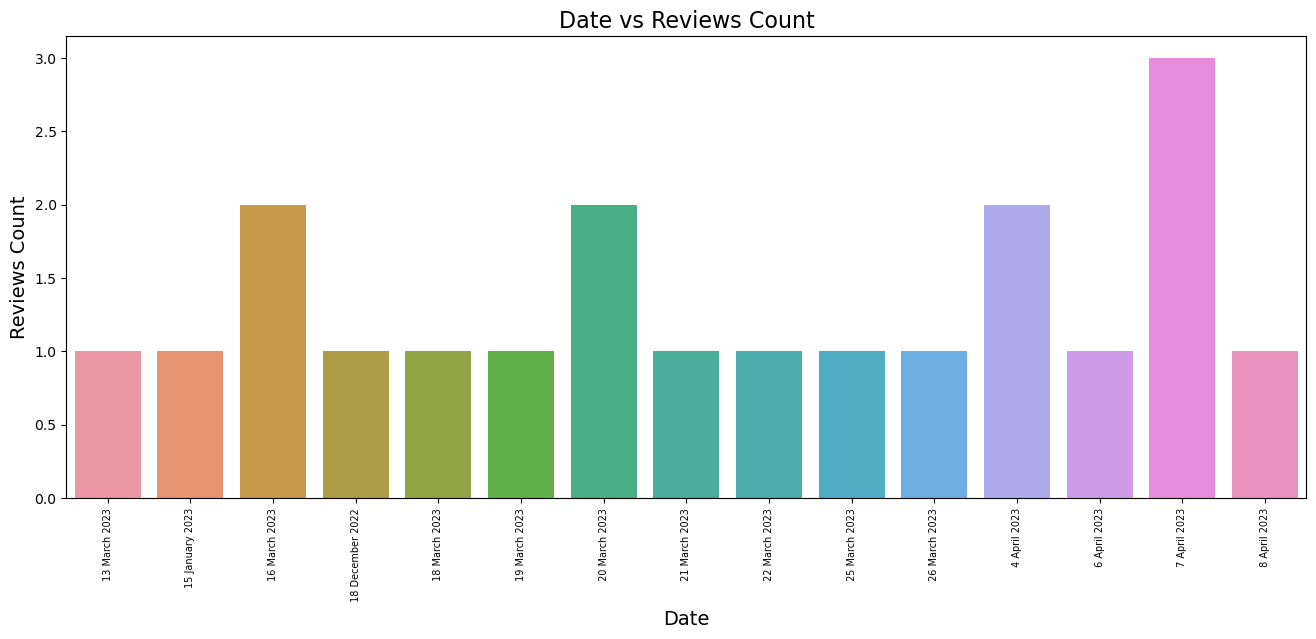

In [36]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

- Percentage of Ratings

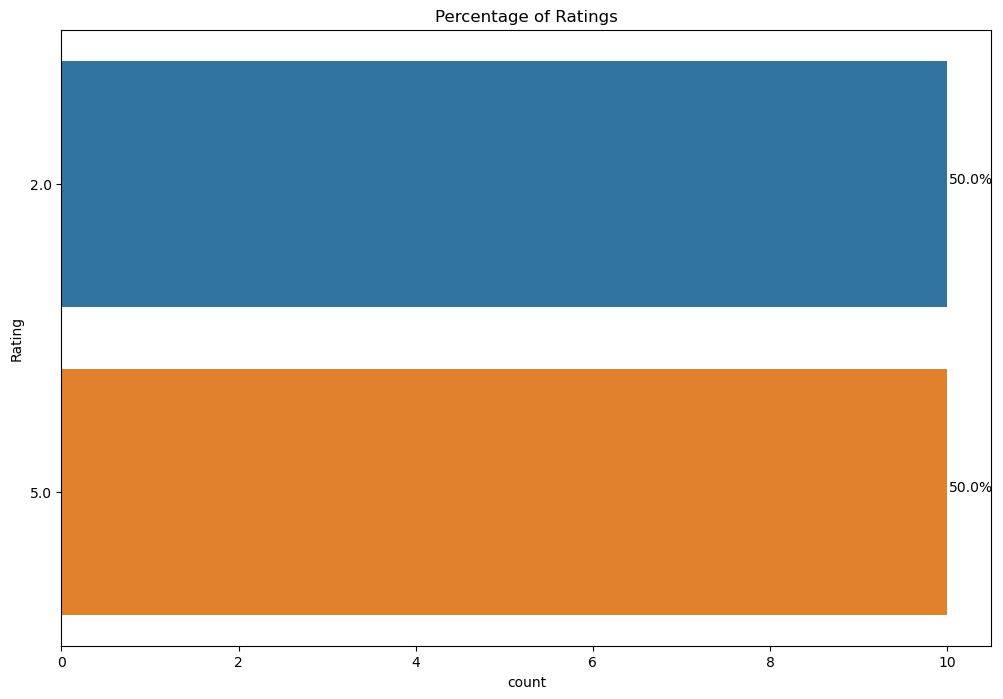

In [37]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [38]:
review = reviews[['Review']]
review

,Review
0,Cons:------1. I bought only for Bass effect an...
1,With in 2 week left side headset unable to wor...
2,I brought this product second time as the firs...
3,"2nd time i purchased this product, as compared..."
4,I still have OnePlus Bullet Z ( Prior version ...
5,Lows highs and mids are not NOT at all optimis...
6,I ordered the Z2 expecting a fine product simi...
7,Like but on neak side wire are so short due w...
8,The ear phone keeps disconnecting white watchi...
9,Hi Product quality is like a cheap un branded ...


# Text cleaning
- Remove unwanted characters
- Text normalization
- Split the text
- lemmatization
- Join the text

In [39]:
lemma = WordNetLemmatizer()

corpus = []

for i in range(len(review)):
    msg = re.sub('[^a-zA-Z]',' ',review['Review'][i])
    msg = msg.lower()
    msg = msg.split()
    
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

In [40]:
corpus

['con bought bass effect dissatisfied quality product brand hardly bass effect headset better look option bass lover complete waste money spent headset looking brand review brand calling bombastic bass mm driver want return day amazon agrees low mids ok high simply throw sound eardrum secondly may like hear music headset long time call quality average nothing great noise cancellation could feel headphone wire small operate control without looking would good increase wise size bit power button color hardly visible black panel case l r engraved earbuds one hardly see added color charging cord around cm small push earbuds much ear pain badly since quality sound convincing may like wear longer headset support aac sound codec given anywhere description mobile support codec expect lower quality audio check codecs phone support buying pro snug fit come pair ear pad fast charging hour min charging awesome tested build quality good headphone wire thin improved price connection seamless mobile l

In [41]:
import collections
from collections import Counter

In [42]:
review['clean'] = pd.DataFrame(corpus)

In [43]:
review

,Review,clean
0,Cons:------1. I bought only for Bass effect an...,con bought bass effect dissatisfied quality pr...
1,With in 2 week left side headset unable to wor...,week left side headset unable workproperly sou...
2,I brought this product second time as the firs...,brought product second time first time experie...
3,"2nd time i purchased this product, as compared...",nd time purchased product compared previous on...
4,I still have OnePlus Bullet Z ( Prior version ...,still oneplus bullet z prior version build qua...
5,Lows highs and mids are not NOT at all optimis...,low high mids optimised poor sound quality pri...
6,I ordered the Z2 expecting a fine product simi...,ordered z expecting fine product similar well ...
7,Like but on neak side wire are so short due w...,like neak side wire short due voice come bike
8,The ear phone keeps disconnecting white watchi...,ear phone keep disconnecting white watching mo...
9,Hi Product quality is like a cheap un branded ...,hi product quality like cheap un branded produ...


Text(0, 0.5, 'Count')

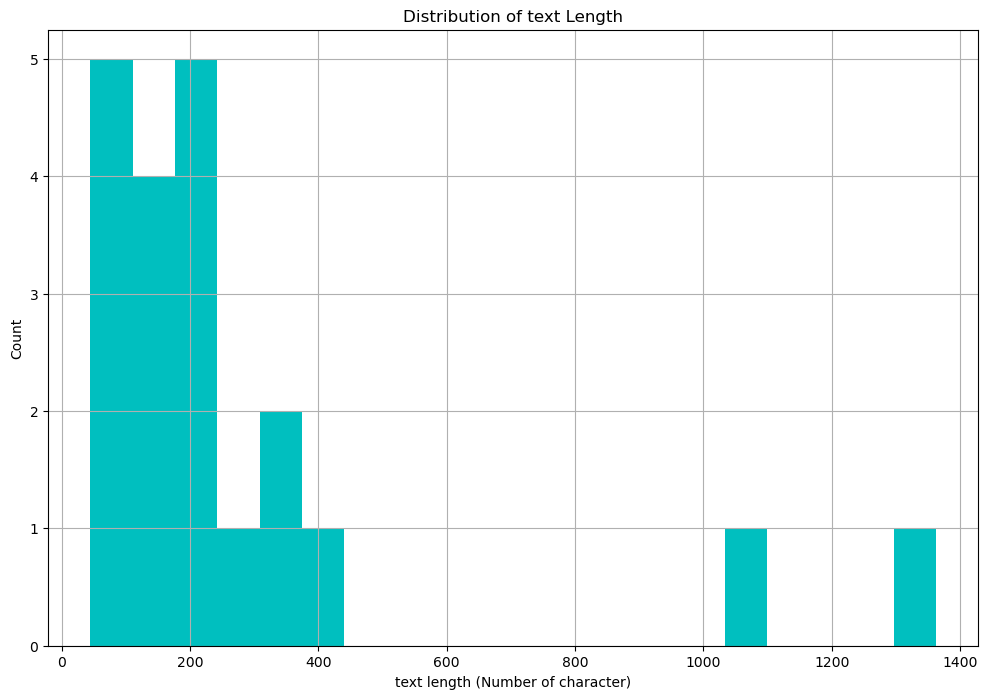

In [44]:
text_length = review['clean'].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist(color='c',bins=20)
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [45]:
from textblob import TextBlob
review['polarity'] = review['clean'].apply(lambda x: TextBlob(x).sentiment[0])
review[['clean','polarity']].head(5)

,clean,polarity
0,con bought bass effect dissatisfied quality pr...,0.123143
1,week left side headset unable workproperly sou...,0.007273
2,brought product second time first time experie...,-0.125000
3,nd time purchased product compared previous on...,0.126667
4,still oneplus bullet z prior version build qua...,0.174026


In [46]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review    20 non-null     object 
 1   clean     20 non-null     object 
 2   polarity  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [47]:
review1 = review.drop(['Review'],axis = 1)
review1

,clean,polarity
0,con bought bass effect dissatisfied quality pr...,0.123143
1,week left side headset unable workproperly sou...,0.007273
2,brought product second time first time experie...,-0.125000
3,nd time purchased product compared previous on...,0.126667
4,still oneplus bullet z prior version build qua...,0.174026
5,low high mids optimised poor sound quality pri...,0.035000
6,ordered z expecting fine product similar well ...,-0.013690
7,like neak side wire short due voice come bike,-0.062500
8,ear phone keep disconnecting white watching mo...,0.000000
9,hi product quality like cheap un branded produ...,0.533333


# Visualizing the Twitter data with word cloud, to see the highly commnly used words in the tweets

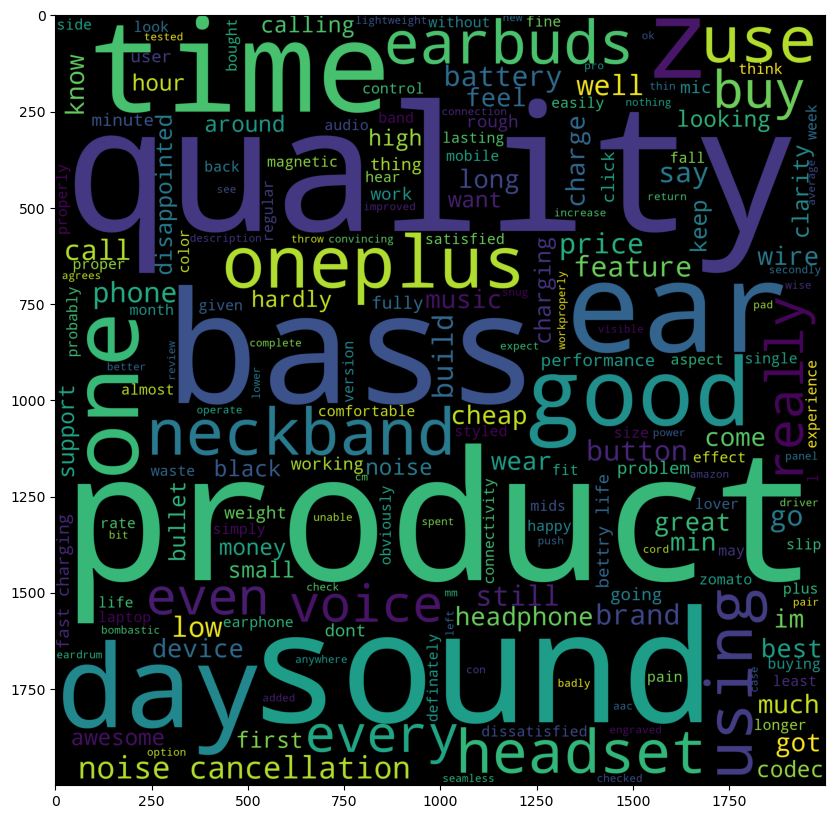

In [48]:
Review_wordcloud = ' '.join(review1["clean"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Creating a user defined function to identify if the tweets are positive,negative or neutral

In [49]:
def sent_type(review1): 
    for i in (review1):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [50]:
sent_type(review1["polarity"])

positive
positive
negative
positive
positive
positive
negative
negative
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive


In [51]:
review1["category"]=review1['polarity']

review1.loc[review1.category > 0,'category']="Positive"
review1.loc[review1.category !='Positive','category']="Negative"

review1["category"]=review1["category"].astype('category')
review1.dtypes

clean         object
polarity     float64
category    category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

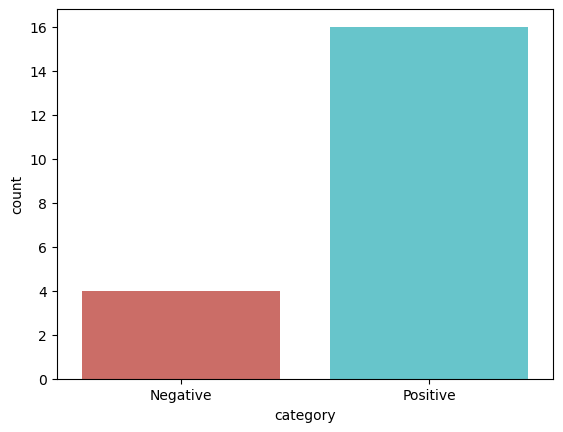

In [52]:
sns.countplot(x='category',data=review1,palette='hls')

In [53]:
review1.category.value_counts(normalize=True).mul(100)

Positive    80.0
Negative    20.0
Name: category, dtype: float64

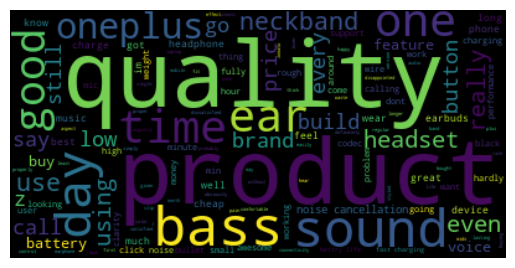

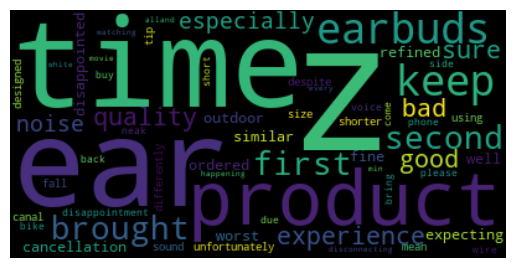

In [55]:
positive_reviews= review1[review1.category=='Positive']
negative_reviews= review1[review1.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.clean.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.clean.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

Conclusion:
- the probabilties predicted by sentiment analysis, these tweets have 20% negative words and 80% positive words¶